## LAB 3 ##
Kar Lok Ng

8971216

### Framing the problem ###
We can assume (for this toy dataset) that we wish to create a model to predict the progression of diabetes in a year, given the patient information we collect today. In this exercise, we will be doing a simple linear regression. 

### Getting the Data, and EDA ###

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# loading the data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# splitting the data into train/test
X_train, X_test, y_train, y_test =  train_test_split(diabetes_X, diabetes_y, test_size = 0.2, random_state= 42)

We first take a look at the shape of the data set to get our bearings.

In [77]:
print(diabetes_X.shape)
print(diabetes_y.shape)

# print out the top 5 rows of the feature and target
print(diabetes_X[0:5, :])
print(diabetes_y[0:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


We see that there are 10 features, with 442 observations. All the features are numeric. However, some of them are not continuous, such as sex. Based on the description of the dataset, the columns represent: age, sex, bmi, blood pressure, total serum colestrol, low density lipoprotein content, high density lipoprotein content, total cholesterol, log of serum triglycerides level, and blood sugar level.

The there is a single numeric and continuous target variable. It represents the progression of the disease 1 year after the baseline. 

In [78]:
# We can format the dataset into a pandas dataframe for ease/to make it more presentable
df_X = pd.DataFrame(X_train, columns= ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
df_y = pd.DataFrame(y_train, columns= ['disease_prog'])

df_all = pd.concat([df_X, df_y], axis= 1)

Since we are considering using a univariate linear regression model, multicollinearity may not be an issue. However, correlations between the independent and dependent variable may be of interest. We would expect the independent variables with strong correlation to the dependent variable to be good candidates for modelling.

We can assess the multicollinearity and correlation to the dependent variable by running the .corr method from pandas onto the data.

In [79]:
df_all.corr().round(2)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_prog
age,1.00,0.17,0.18,0.31,0.27,0.22,-0.04,0.18,0.27,0.28,0.20
sex,0.17,1.00,0.03,0.18,0.02,0.12,-0.36,0.32,0.11,0.17,0.01
bmi,0.18,0.03,1.00,0.39,0.27,0.26,-0.35,0.43,0.47,0.40,0.60
bp,0.31,0.18,0.39,1.00,0.24,0.16,-0.12,0.21,0.38,0.37,0.44
tc,0.27,0.02,0.27,0.24,1.00,0.89,0.05,0.55,0.53,0.33,0.20
ldl,0.22,0.12,0.26,0.16,0.89,1.00,-0.19,0.65,0.31,0.29,0.15
hdl,-0.04,-0.36,-0.35,-0.12,0.05,-0.19,1.00,-0.74,-0.37,-0.29,-0.38
tch,0.18,0.32,0.43,0.21,0.55,0.65,-0.74,1.00,0.61,0.43,0.43
ltg,0.27,0.11,0.47,0.38,0.53,0.31,-0.37,0.61,1.00,0.48,0.55
glu,0.28,0.17,0.40,0.37,0.33,0.29,-0.29,0.43,0.48,1.00,0.39


We can vizualize this correlation matrix as a plot to get a more intuitive understanding.

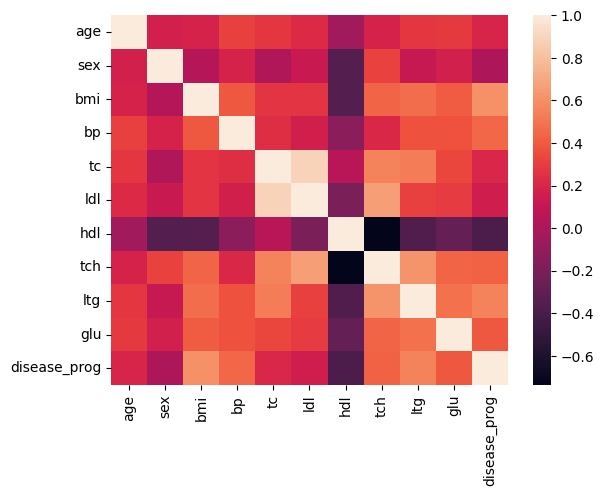

In [80]:
ax = sns.heatmap(df_all.corr())

We can see that several of the independent variables are actually quite highly correlated with each other (e.g. tc and ldl at 0.89). As such, care must be taken if we were to put these two factors together within our multivariate linear regression model, as it violates a model assumption. 

Another thing we can look at is the distribution in BMI. Since we are going to be modelling BMI against disease progression, this may be important in giving us further context to the data.

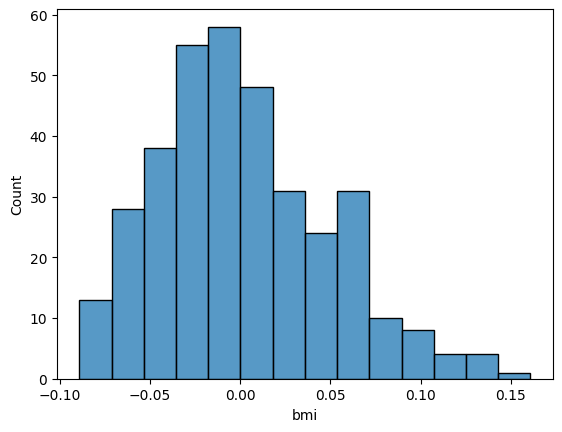

In [81]:
sns.histplot(df_X['bmi'])
plt.show()

Although we cannot tell the exact BMI of the observations(since the data is already normalized), we can get a good idea of the distribution of the 442 observations. We can see that there seems to be a right skew to the data.

### Fitting the model ### 

Slope is: 998.577689137559
Intercept is: 152.00335421448167
Train MAE is: 51.37972765404718
Test MAE is: 52.25997644534553
Train MSE is: 3854.11265207582
Test MSE is: 4061.8259284949263


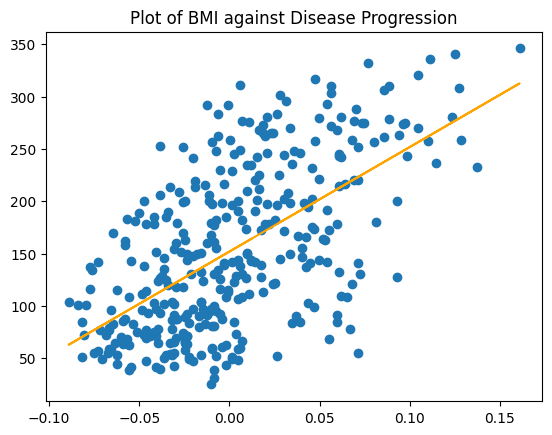

In [82]:
# First we do BMI
x_train_bmi = X_train[:, 2]
x_test_bmi = X_test[:, 2]

model = LinearRegression()
reg_bmi = model.fit(x_train_bmi.reshape(-1, 1), y_train)

# define the intercept and coefficient
reg_bmi_m = reg_bmi.coef_[0]
reg_bmi_c = reg_bmi.intercept_

# get the within training predicted values
y_train_pred = reg_bmi_m* x_train_bmi + reg_bmi_c

# get the testing predicted values
y_test_pred = reg_bmi_m * x_test_bmi + reg_bmi_c

# get the MAE and MSE
train_MAE = mean_absolute_error(y_train, y_train_pred)
train_MSE = mean_squared_error(y_train, y_train_pred)
test_MAE = mean_absolute_error(y_test, y_test_pred)
test_MSE = mean_squared_error(y_test, y_test_pred)

print("Slope is: " + str(reg_bmi_m))
print("Intercept is: " + str(reg_bmi_c))
print("Train MAE is: " + str(train_MAE))
print("Test MAE is: " + str(test_MAE))
print("Train MSE is: " + str(train_MSE))
print("Test MSE is: " + str(test_MSE))

# Plotting the model
plt.scatter(x_train_bmi, y_train)
plt.plot(x_train_bmi, y_train_pred, color= 'orange')

plt.title("Plot of BMI against Disease Progression")
plt.show()

### Take Aways ###
Overall, the MSE/MAE are quite high. The training MSE/MAE and the testing MSE/MAE are not very different, and as such I do not think overfitting is an issue. Given that BMI and disease progression after 1 year have the highest correlation within the given independent variables, it is likely the best candidate for such a model given the data we have. 

One thing to note is that there was a right skew to the BMI data. This means there there is a higher number of observations within the lower end of the BMI than the higher end. This may affect the model's predictive performance on the higher end of the BMI scale.

Further model diagnostics can be done, such as residual plots and residual QQ-plots, to check whether model assumptions are satisfied, and thus get a better idea of how the adequacy of the model to the data.

This is likely an adequate baseline performance to compare other methods to, as it is simple to implement and interpret. Other methods can be explored and tested against this simple univariate linear regression to get a better sense of model performance in the future.